#System of Linear Equation

*submitted by:*

Aquiro, Freddielyn E.

Canoza, Cherrylyn

Joaquin, Christopher Marc 


## Requirements: 
1. Provide one (1) system of linear equations WORD problem and provide the source (i.e., book, website, online course, etc.):
Make sure that the variables should be three (3), and a minimum of three (3) equations.
2. Represent a system of linear equations in the following ways:
Standard bracketed form
Linear Combination form (Matrix)
Vector Visualization
3. A programmed algorithm for solving the problem.

## Word Problem
 Axel bought 1 book, 2 color pencils, 4 sharpie pens total of 2,840 php, Jack 3 books 2 prism color pencils , 7 sharpie pens total of 4,370 and Leslie bought 4 books , 1 prism color pencils and 12 sharpie pens total of 4,620 at National Bookstor. Since they spent their money on each item, Axel and his friends wants to know how much is the price of each item.

## Standard Bracketed Form 
$Let : \\ 
a = book\ ,  b = prism\ color\ pencil \ , c = sharpie\ pens \ \\ $

$$ Axel = \left\{ \begin{array}\\ a + 2b + 4c = 2840\end{array}\right.$$  
$$ Jack = \left\{ \begin{array}\\ 3a + 2b + 7c= 4370\end{array}\right.$$  
$$ Leslie = \left\{ \begin{array}\\  4a + y + 12c = 4620\end{array}\right. $$

## Linear Combination Form (Matrix) .
$$\begin{bmatrix}1&2&4\\3&2&7\\4&1&12\end{bmatrix}\cdot\begin{bmatrix}a\\b\\c\end{bmatrix} = \begin{bmatrix}2840\\4370\\4620\end{bmatrix}$$

## Visualization of Vectors 

Text(0.5, 0.92, '3d plot.')

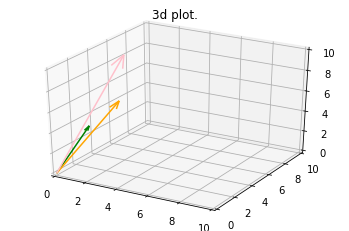

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
A = np.array([
               [1,2,4],
               [3,2,7],
               [4,1,12]
                ])
fig = plt.figure() 
ax = fig.gca(projection='3d') 
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_zlim([0, 10])

ax.quiver(0, 0, 0, A[0,0], A[0,1], A[0,2], arrow_length_ratio=0.10, colors='green')
ax.quiver(0, 0, 0, A[1,0], A[1,1], A[1,2], arrow_length_ratio=0.10, colors='orange')
ax.quiver(0, 0, 0, A[2,0], A[2,1], A[2,2], arrow_length_ratio=0.10, colors='pink')
plt.title("3d plot.")

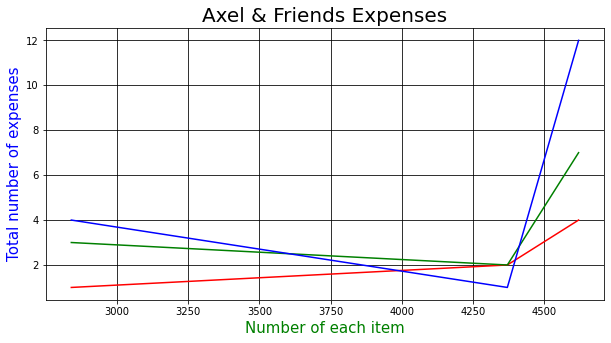

In [2]:
ax= np.array([1,2,4])
jk= np.array([3,2,7])
ls = np.array([4,1,12])
ts = np.array([2840,4370,4620])

plt.figure(figsize=(10,5))
plt.title('Axel & Friends Expenses', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(ts, ax, color = 'red')
plt.plot(ts, jk, color = 'green')
plt.plot(ts, ls, color = 'blue') 
plt.xlabel('Number of each item', fontdict={'fontsize':15}, color='green')
plt.ylabel('Total number of expenses', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

## Solving the System of Linear System

In [3]:
qty = np.array([
               [1,2,4],
               [3,2,7],
               [4,1,12]
                ])
total_spent = np.array([
                        [2840],
                        [4370],
                        [4620]
                       ])
X = np.linalg.solve(qty, total_spent)
print (X)

[[600.]
 [900.]
 [110.]]


In [4]:
prices = np.linalg.inv(qty) @ total_spent
print(' the price of each book is: PHP {:2f}'.format(float(prices[0])))
print(' the price of each prism color pencil is: PHP {:2f}'.format(float(prices[1])))
print(' the price of each sharpie pens is: PHP {:2f}'.format(float(prices[2])))

 the price of each book is: PHP 600.000000
 the price of each prism color pencil is: PHP 900.000000
 the price of each sharpie pens is: PHP 110.000000


therefore the values of a = 600 , b = 900, c = 110 . 

# Reference
[1] “numeth2021/NuMeth_3_System_of_Linear_Equations.ipynb at main · dyjdlopez/numeth2021 · GitHub.” https://github.com/dyjdlopez/numeth2021/blob/main/Week%207-9%20-%20Solving%20System%20of%20Linear%20Equations/NuMeth_3_System_of_Linear_Equations.ipynb (accessed May 05, 2021). 

# Curve Fitting

##Requirements 
1. Provide one (1) regression data problem:
The problem should have more than 1 feature and data records should be greater than 30 lines.
Use the Diabetes dataset from sklearn.
2. A programmed regression routine for solving the problem.

  Implement using sklearn's Multiple Linear Regression, Polynomial Curve, and   the Normal Equation.

In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
# Data Preparation
# importing data set from sklearn diabetes
db_data = datasets.load_diabetes()

In [7]:
diabetes_data = pd.DataFrame(db_data.data, columns=db_data.feature_names)
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [8]:
# checking its rows and columns 
diabetes_data.shape

(442, 10)

In [9]:
# target refers to y-axis. setting target as the data of disease progression
diabetes_data['disease progression'] = db_data.target
diabetes_data['disease progression'].head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: disease progression, dtype: float64

In [10]:
#cheking the updated rows and columns of the data
diabetes_data.shape

(442, 11)

 Visualization of percentage related on the following 
 bp =  average blood pressure 

 s4= total cholesterol / HDL (tch)
 
 s6 = blood sugar level 

which measure of disease progression one year after baseline [1] 

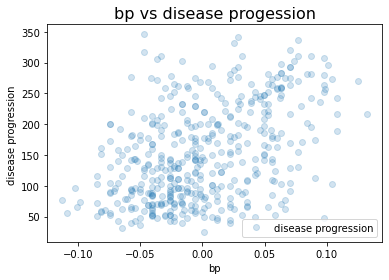

In [11]:
# Visualizing the average blood pressure and disease progression
diabetes_data.plot(x='bp', y='disease progression', style='o', alpha=0.2)  
plt.title('bp vs disease progession', fontsize=16)  
plt.xlabel('bp')  
plt.ylabel('disease progression ')  
plt.show()

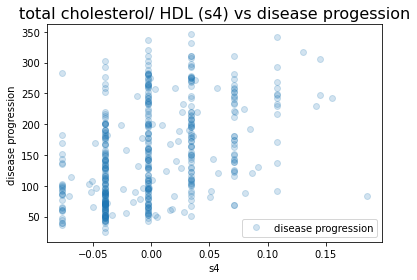

In [12]:
diabetes_data.plot(x='s4', y='disease progression', style='o', alpha=0.2)  
plt.title('total cholesterol/ HDL (s4) vs disease progession', fontsize=16)  
plt.xlabel('s4')  
plt.ylabel('disease progression ')  
plt.show()

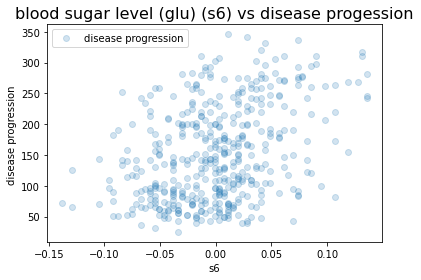

In [13]:
diabetes_data.plot(x='s6', y='disease progression', style='o', alpha=0.2)  
plt.title('blood sugar level (glu) (s6) vs disease progession', fontsize=16)  
plt.xlabel('s6')  
plt.ylabel('disease progression ')  
plt.show()

## Multiple Linear Regression

In [14]:
# Multiple Regreesion
X = pd.DataFrame(np.c_[diabetes_data['s4'], diabetes_data['bp'], diabetes_data['s6']], columns=['s4','bp','s6'])
y = diabetes_data['disease progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [15]:
# Fitting a Multiple Linear Model
l_reg= LinearRegression()  
l_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Summary of modelling 
l_reg_sum =  pd.DataFrame(X.columns, columns=['Features'])
l_reg_sum['Weights Raw'] = l_reg.coef_.reshape(3,1)
l_reg_sum = l_reg_sum.append({'Features':'Intercept', 'Weights Raw':float(l_reg.intercept_)}, ignore_index=True)
l_reg_sum

,Features,Weights Raw
0,s4,476.371697
1,bp,520.717573
2,s6,223.540217
3,Intercept,152.003079


In [17]:
# prediction model 
preds = l_reg.predict(X_test)
res = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
res

,Actual,Predicted
246,78.0,101.813989
425,152.0,61.865283
293,200.0,158.542200
31,59.0,63.717138
359,311.0,198.762461
...,...,...
277,64.0,119.706441
132,107.0,151.337305
213,49.0,122.883893
286,60.0,73.843248


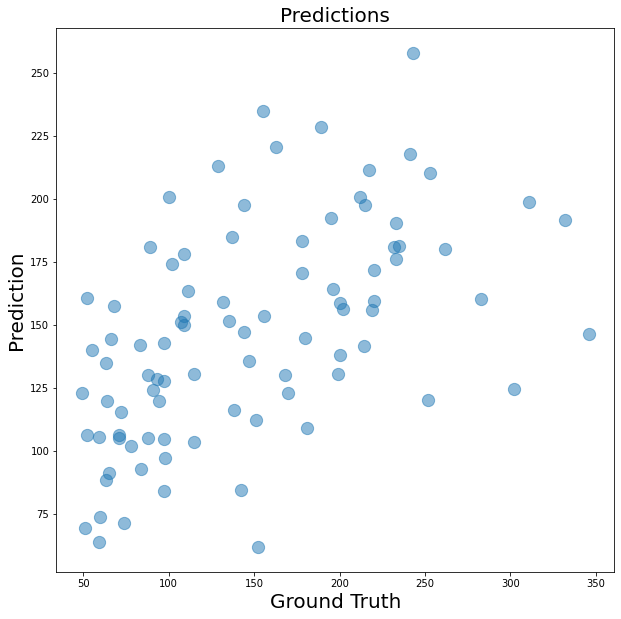

In [18]:
plt.figure(figsize=(10,10))
plt.title('Predictions', fontsize=20)
plt.scatter(y_test, preds, s = 150,  alpha=0.5)
plt.xlabel('Ground Truth', fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.show()

In [19]:
# Metrics
# adjusted r squared as per lecture

def adjr2(r2,x):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [20]:
MSE = metrics.mean_squared_error(y_test, preds)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, preds)
AR2 = adjr2(R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Multiple Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Multiple Regression
0,MSE,3834.449487
1,RMSE,61.922932
2,R^2,0.280452
3,Adjusted R^2,0.274267


## Polynomial Regression

In [21]:
# POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
X = pd.DataFrame(np.c_[diabetes_data['s4'], diabetes_data['bp'], diabetes_data['s6'],diabetes_data['s1']], columns=['s4','bp','s6','s1'])
y = diabetes_data['disease progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [22]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [23]:
print(X_poly)

[[ 1.00000000e+00  3.43088589e-02 -6.76422830e-02 ...  1.97895780e-03
   2.19497116e-03  2.43456348e-03]
 [ 1.00000000e+00  5.60805202e-02 -1.14087284e-02 ...  1.02778960e-03
   1.27305716e-03  1.57685439e-03]
 [ 1.00000000e+00 -2.59226200e-03  4.25295792e-02 ...  2.72463581e-05
  -3.72467191e-04  5.09175604e-03]
 ...
 [ 1.00000000e+00 -3.94933829e-02 -2.28849640e-02 ...  1.17063562e-03
   2.17217379e-03  4.03057866e-03]
 [ 1.00000000e+00  1.29062088e-02  5.85963092e-02 ...  2.36464207e-03
  -2.88648387e-03  3.52348849e-03]
 [ 1.00000000e+00 -3.94933829e-02 -5.73136710e-02 ...  2.72463581e-05
   1.30287145e-04  6.23009508e-04]]


In [24]:
# Fitting a Multiple Linear Model
l_reg2 = LinearRegression()
l_reg2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
preds = l_reg2.predict(poly_reg.fit_transform(X_test))

In [26]:
poly_MSE = metrics.mean_squared_error(y_test,preds)
poly_RMSE = np.sqrt(poly_MSE)
poly_R2 = metrics.r2_score(y_test,preds)
poly_AR2 = adjr2(poly_R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Polynomial Regression'] = poly_MSE, poly_RMSE, poly_R2, poly_AR2
model_metrics

,Metrics,Polynomial Regression
0,MSE,4219.197941
1,RMSE,64.955353
2,R^2,0.208253
3,Adjusted R^2,0.199152


## Normal Equation 

In [27]:
X = diabetes_data['s4'].values.reshape(-1,1)
y = diabetes_data['disease progression'].values.reshape(-1,1)

n = len(diabetes_data['s4']) #no. rows
bias = np.ones((n,1)) #column-1 of Matrix X
xnew = np.reshape(X,(n,1)) #reshaping the data
xnew1 =np.append(bias,xnew,axis=1) #forming Matrix X
xnew1_t = np.transpose(xnew1) #transpose
xnew_t_dot_x_new = xnew1_t.dot(xnew1) #matrix multiplication
temp_1 = np.linalg.inv(xnew_t_dot_x_new) #inverse of a matrix
temp_2 = xnew1_t.dot(y)

In [28]:
#Finding coefficients:

theta = temp_1.dot(temp_2)
Intercept = theta[0]
Slope = theta[1]
print("Intercept:",Intercept)
print("Slope:",Slope)

Intercept: [152.13348416]
Slope: [696.88303009]


In [29]:
#Predicting values:
def predict_value(input_feature,slope,intercept):
    return slope*input_feature+intercept

In [30]:
s4 = 4
prediction = predict_value(s4,Slope,Intercept)
print(prediction)

[2939.66560453]


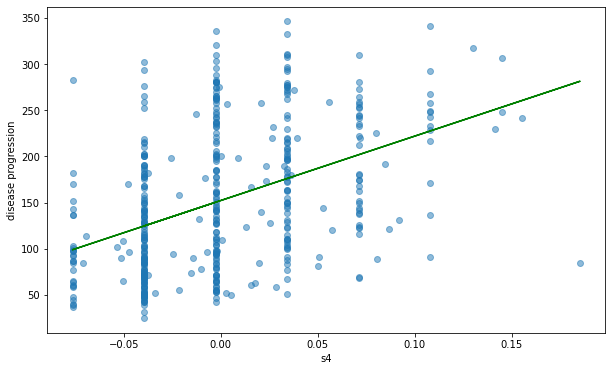

In [31]:
#Plotting the regression Line:
plt.figure(figsize=(5*2,3*2))
plt.scatter(X,y, alpha=0.5)
plt.xlabel('s4')
plt.ylabel('disease progression')
plt.plot(X,Slope*X+Intercept, color="green")

##Polynomial Curve

In [32]:
def linear_regressor(X,y):
  X = np.array(X)
  y = np.array(y)
  n = X.size
  w0 = (y.mean()*np.sum(X**2)-X.mean()*np.sum(X*y)) / (np.sum(X**2) - n*X.mean()**2)
  w1 = (np.sum(X*y) - X.mean()*np.sum(y)) / (np.sum(X**2) - n*X.mean()**2)
  return w0,w1
w0,w1 = linear_regressor(X,y)
print("Linear Regression Equation: y = {:.3f}x + {:.3f}".format(w1, w0))

Linear Regression Equation: y = 696.883x + 152.133


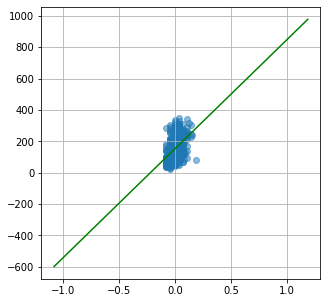

In [33]:
def show_regline(X,y,w1,w0):
  x_min, x_max = X.min() - 1, X.max() + 1
  linex = np.linspace(x_min, x_max)
  liney = w1*linex+w0
  plt.figure(figsize=(5,5))
  plt.grid()
  plt.scatter(X,y, alpha=0.5)
  plt.plot(linex, liney, c='green')
  plt.show()
show_regline(X,y,w1,w0)

7120.963785085329


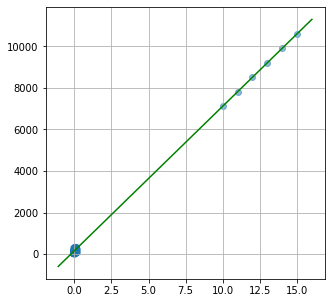

In [34]:
def lin_reg(val,w0,w1):
  return w1*val + w0 #model
print(lin_reg(10, w0, w1))
X_new, y_new = X.copy(), y.copy()
for i in range(10,16):
  X_new = np.insert(X_new,-1, i)
  y_new = np.insert(y_new,-1, lin_reg(i,w0,w1))
show_regline(X_new, y_new, w1, w0)

In [35]:
X_1 = np.arange(0, 13,1)
y_1 = X_1 - 2 * (X_1 ** 2) + 0.5 * (X_1 ** 3) + np.random.normal(-3, 3, 13)

In [36]:
def show_regline(X,y,w1,w0):
  x_min, x_max = X.min() - 1, X.max() + 1
  linex = np.linspace(x_min, x_max)
  liney = w1*linex+w0
  plt.figure(figsize=(5,5))
  plt.grid()
  plt.scatter(X_1,y_1, s = 256, color='blue', alpha=0.5)
  plt.plot(linex, liney, c='green')
  plt.show()

In [37]:
def linear_regressor(X,y):
  X = np.array(X)
  y = np.array(y)
  n = X.size
  w0 = (y.mean()*np.sum(X**2)-X.mean()*np.sum(X*y)) / (np.sum(X**2) - n*X.mean()**2)
  w1 = (np.sum(X*y) - X.mean()*np.sum(y)) / (np.sum(X**2) - n*X.mean()**2)
  return w0,w1
w0,w1 = linear_regressor(X,y)

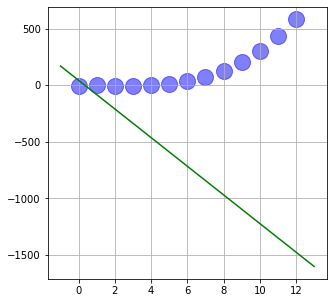

In [38]:
w0_q,w1_q = linear_regressor(X_1, y_1)
show_regline(X_1,y_1,w0_q,w1_q)